Some imports...

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import os

In [48]:
def time_vs_processes_plot(name_csv_file):

    data = pd.read_csv(name_csv_file, header=0)
    data['log2size'] = np.log2(data['Size'])
    
    fig, ax = plt.subplots(figsize=(10, 6))
    norm = Normalize(vmin=data['log2size'].min(), vmax=data['log2size'].max())

    for log2size in data['log2size'].unique():
        ax.plot(
            data[data['log2size'] == log2size]['Processes'],
            data[data['log2size'] == log2size]['Latency'],
            '-o',
            label = f'log2size = {log2size}',
            color = plt.cm.viridis(norm(log2size))
        )

    title = name_csv_file.rsplit('/', 1)[
    ax.set_title(title)
    ax.set_xlabel('Number of processes')
    ax.set_ylabel('Time (seconds)')
    
    sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
    cbar = fig.colorbar(sm, ax=ax)
    cbar.set_label('log2(Size)')
    cbar.set_ticks(data['log2size'].unique())
    cbar.set_ticklabels(data['log2size'].unique())
    
    plt.show()
    # save the plot
    fig.savefig(f'plots/{title}.png')


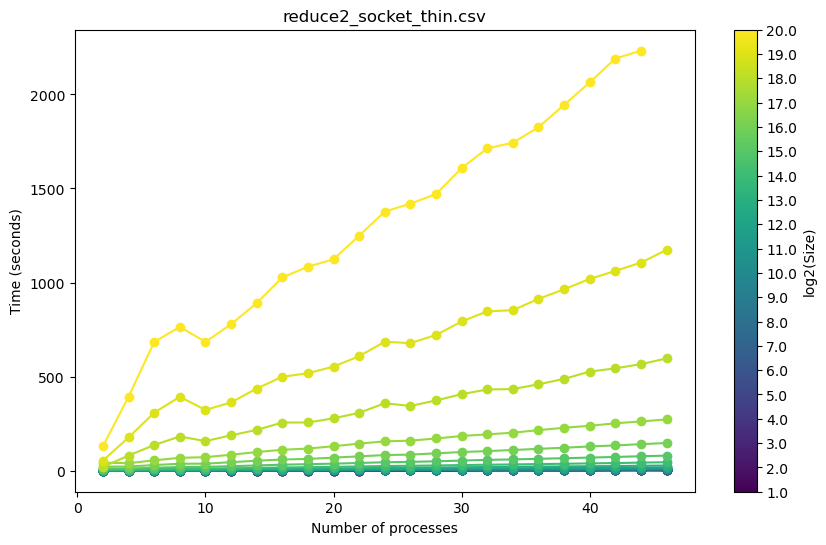

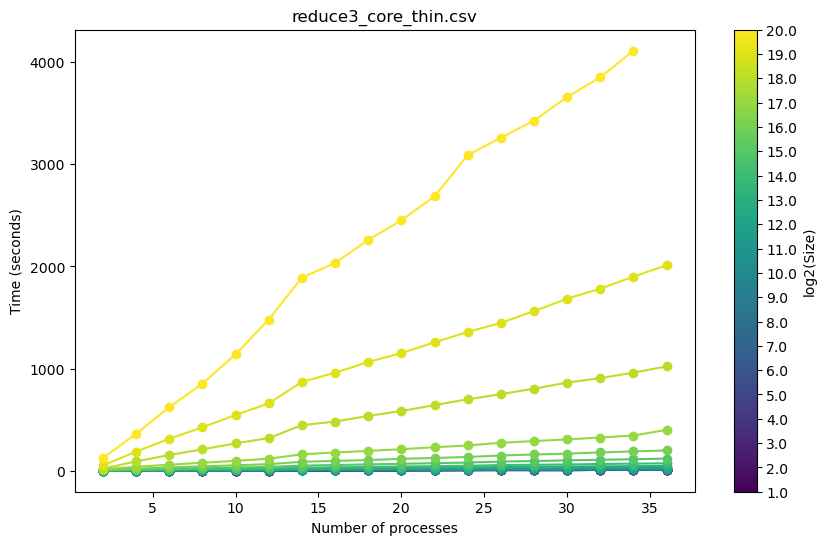

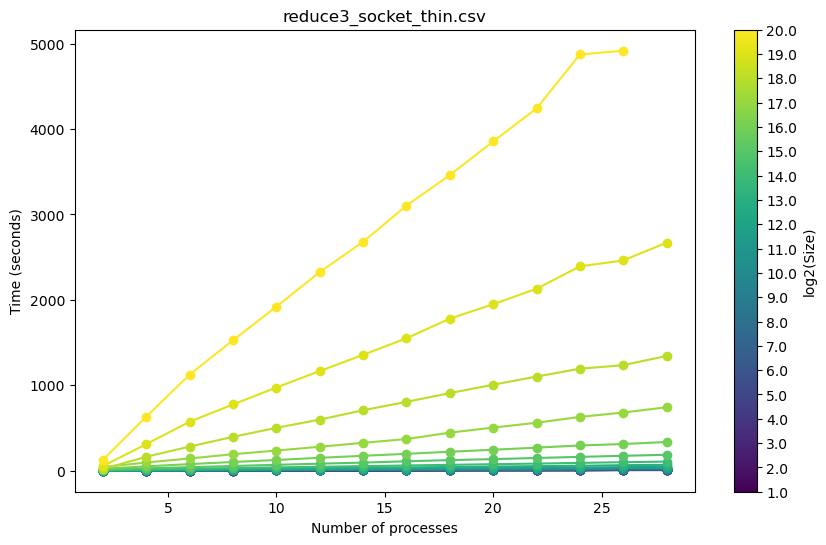

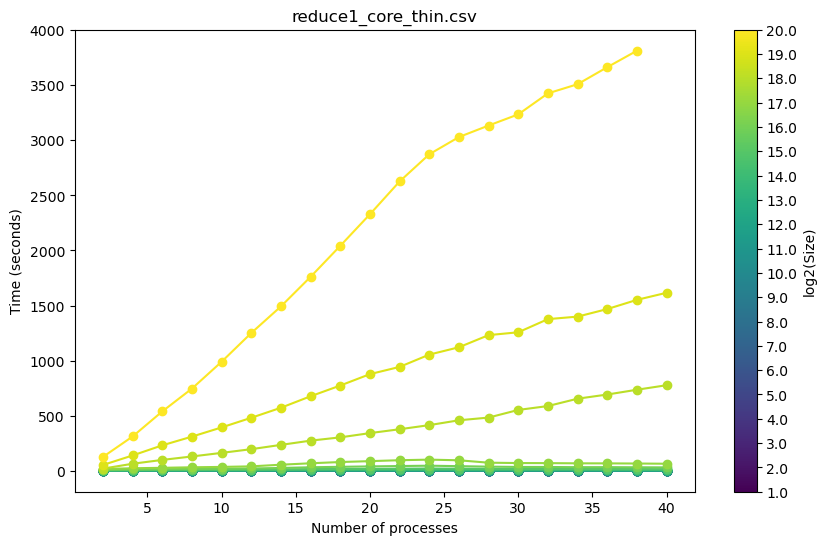

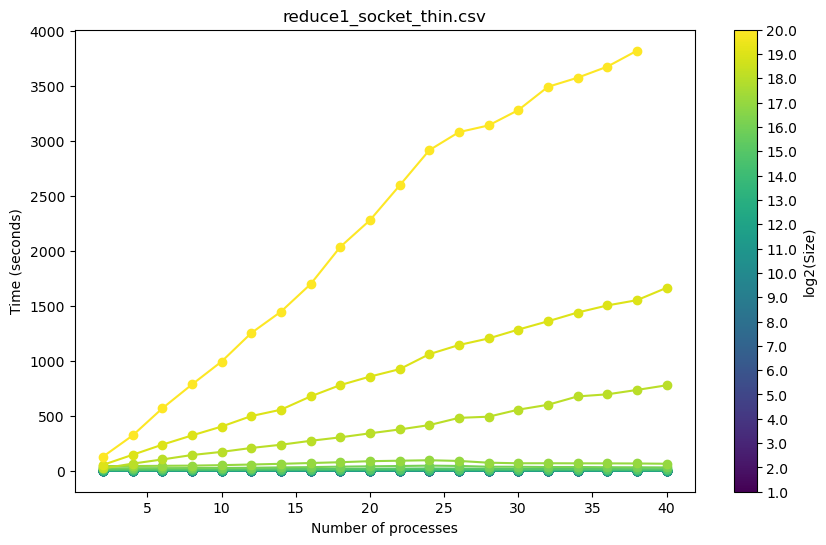

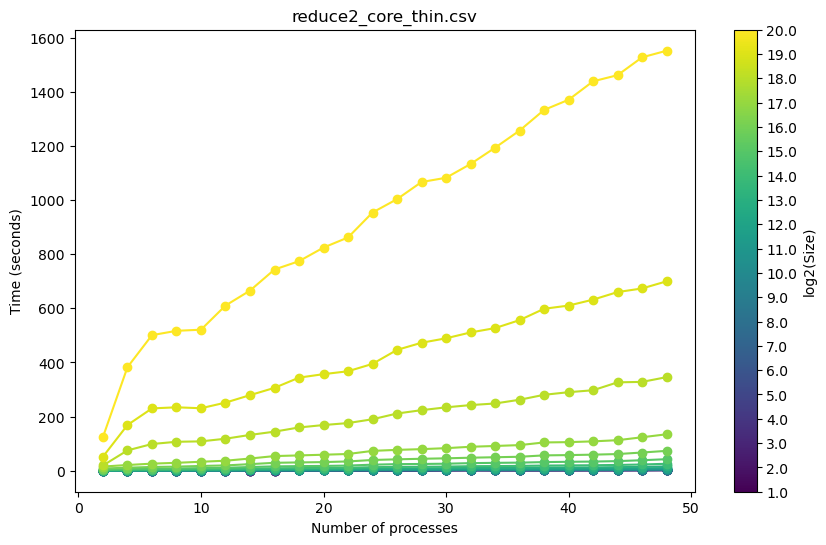

In [51]:
for file in os.listdir("reduce"):
    if file.endswith("thin.csv"):
        time_vs_processes_plot(f'reduce/{file}')
